In [ ]:
# k-Armed Bandit

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class CreateBandit:

    def __init__(self):
        # Create bandits with random mean and std dev
        self.mean = 4 * np.random.random() - 2
        self.std = np.random.random()
        
    def pull(self):
        # Generate bandit reward
        return np.random.normal(self.mean, 1)

In [3]:
# Create N bandits
n_bandits = 6
bandits = [CreateBandit() for n in range(n_bandits)]

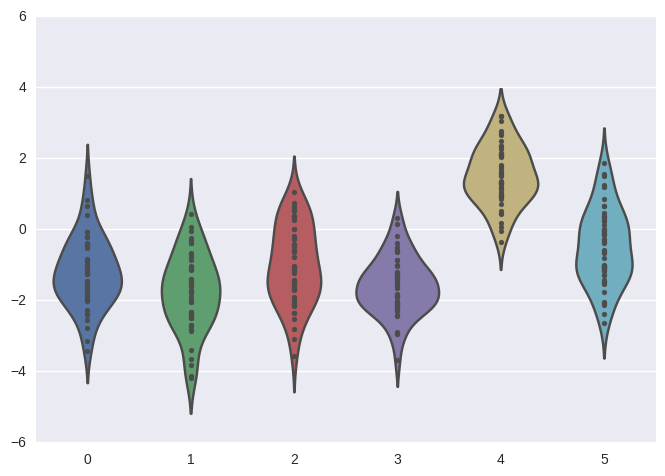

In [4]:
# Lists of rewards of all bandits
rewards = []
for bandit in bandits:
    # Append rewards of each bandit
    rewards.append([bandit.pull() for _ in range(50)])    

# Plot bandit rewards
sns.violinplot(data=rewards, inner="points")

Compare episolons and fixed vs variable step sizes

In [6]:
def evaluate(n_bandits=10, Q_init=0, epsilons=[0, 0.01, 0.1, 0.2], steps=1000, epochs=2000, fixed_step=True, step_size=0.1):

    for epsilon in epsilons:
        epoch_rewards = []
        for epoch in range(epochs):
            # Create N bandits            
            bandits = [CreateBandit() for n in range(n_bandits)]

            # Start Q and N for each action in zero
            Q = Q_init * np.ones(len(bandits))
            N = np.zeros(len(bandits))

            episode_rewards = []
            for _ in range(steps):
                # Choose best action with epsilon probability to explore
                greedy_chance = np.random.random()
                action = np.argmax(Q) if greedy_chance > epsilon else np.random.randint(len(Q))
                # Pull choosen bandit
                reward = bandits[action].pull()
                episode_rewards.append(reward)
                # Update N and Q
                if fixed_step:
                    Q[action] += step_size * (reward - Q[action])
                else:
                    N[action] += 1
                    Q[action] += (1/N[action]) * (reward - Q[action])
            # Store epoch rewards    
            epoch_rewards.append(episode_rewards)

        # Plot mean rewards
        plt.plot(np.mean(epoch_rewards, 0), label=epsilon)    
        plt.legend(loc='lower right')
    plt.xlabel('Steps')
    plt.ylabel('Reward')

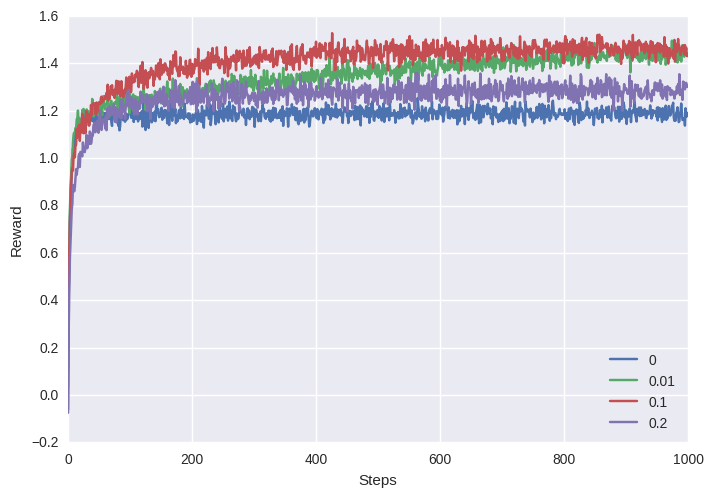

In [7]:
evaluate(fixed_step=False)

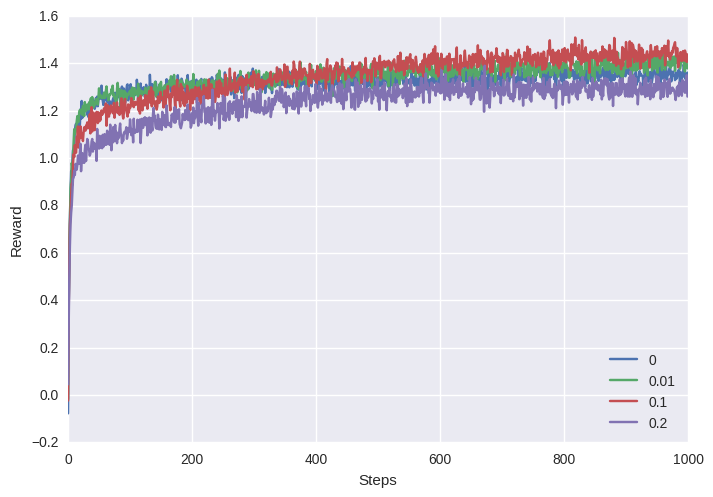

In [8]:
evaluate(step_size=0.1)

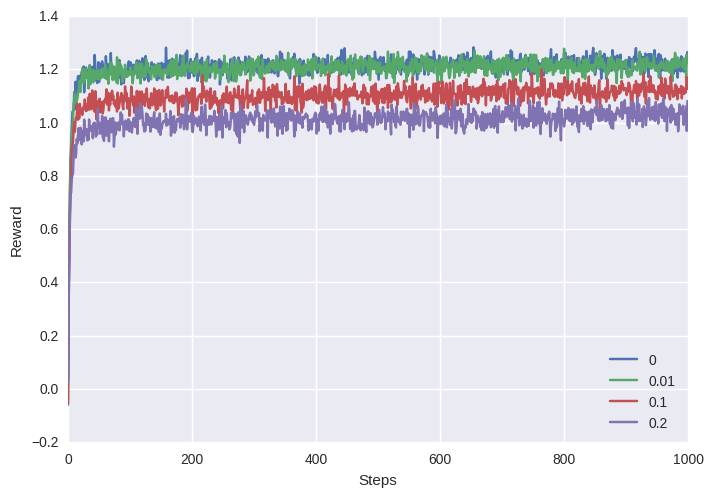

In [9]:
evaluate(step_size=0.01)

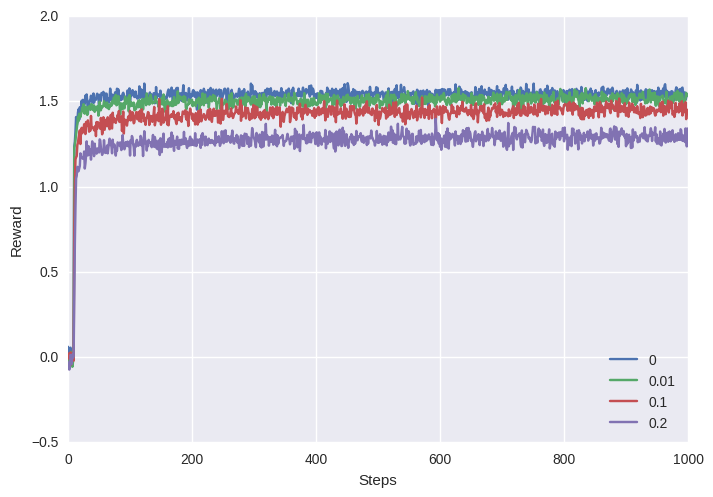

In [10]:
evaluate(Q_init=5, fixed_step=False)

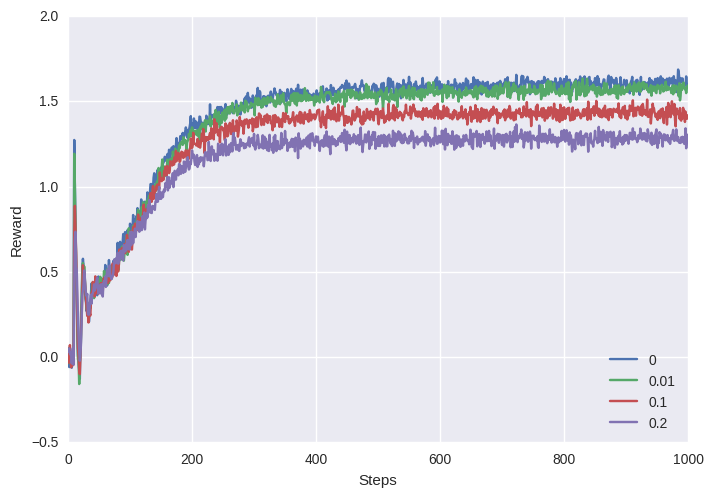

In [11]:
evaluate(Q_init=5, step_size = 0.1)